# MODELO DE PREDICCION 

Este modelo se creo a partir de un dataset que contenia 6 paises de 5 regiones
y 13 series:

#### Paises + Regiones:
- Latin America & Caribeann(CLA)

    BRA(Brazil)-MEX(Mexico)-COL(Colombia)-ARG(Argentina)-PER(Peru)-CHL(Chile)

- Africa(AFR)

    NER(Nigeria)-ETH(Ethiopia)-EGY(Egipto)-COD(Congo)-TZA(Tanzania)-ZAF(South Africa)

- European Union(EUU)

    DEU(Germany)-FRA(Francia)-ITA(Italia)-ESP(España)-POL(Polonia)-ROU(Romania)

- South Asia(SAS)

    IND(India)-PAK(Pakistan)-BGD(Bangladesh)-AFG(Afghanistan)-NPL(Nepal)-LKA(Sri Lanka)

- World(WLD)

    CHN(China)-AUS(Australia)-USA(United States)-IDN(Indonesia)-GBR(Gran Bretaña)-RUS(Rusia)

# Series

#### Series + Nombres
- 'SP.ADO.TFRT',: Adolescent fertility rate (births per 1,000 women ages 15-19) 
- 'SP.DYN.CBRT.IN',: Birth rate, crude (per 1000 people)
- 'SH.XPD.CHEX.GD.ZS',: Current health expenditure (% of GDP)
- "SH.XPD.CHEX.PC.CD",: Current health expenditure per capita (current US$)
- "SP.DYN.TFRT.IN",: Fertility rate, total (births per woman)
- "SP.DYN.LE00.IN",: Life expectancy at birth, total (years)
- "SP.DYN.IMRT.IN",: Mortality rate, infant (per 1,000 live births)
- "SP.POP.GROW",: Population growth (annual %)
- "SP.POP.TOTL",: Population, total
- "SH.STA.SUIC.P5",: Suicide mortality rate (per 100,000 population)
- "NY.GDP.MKTP.KN",: GDP(constant LCU)
- NCD_BMI_25A : Prevalence of overweight among adults, BMI &GreaterEqual; 25 (crude   estimate) (%)
- NCD_HYP_PREVALENCE_A:  Prevalence of hypertension among adults aged 30-79 years, age- standardized



In [120]:
#Impotamos librerias que utlizaremos mas adelante
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [179]:
#Creamos un dataframe con el csv AAA
dato=pd.read_csv("AAA.csv")

In [180]:
#Borramos columnas que no vamos a utlizar
dato.drop(["countryiso3code"],axis=1,inplace=True)

In [181]:
#Reemplazamos "." por "," en la columna SP.POP.GROW
dato["SP.POP.GROW"] = [float(x.replace(',','.')) for x in dato["SP.POP.GROW"]]
dato["SP.POP.GROW"]


0       8.953909
1      13.800249
2      17.092214
3      17.581793
4      15.319591
         ...    
955     2.833895
956     2.727406
957     2.632584
958     2.546713
959     2.457682
Name: SP.POP.GROW, Length: 960, dtype: float64

In [187]:
#Enmascaramos los datos para el año 2020
ddn=dato.date==2020

In [188]:
data =dato[ddn]

In [191]:
data.drop(["date"],axis=1,inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_18748\510141900.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(["date"],axis=1,inplace=True)


In [192]:
data

,SH.XPD.CHEX.PC.CD,SH.XPD.CHEX.GD.ZS,SP.ADO.TFRT,SP.POP.TOTL,SP.DYN.CBRT.IN,SP.DYN.TFRT.IN,SP.DYN.LE00.IN,SP.DYN.IMRT.IN,SH.STA.SUIC.P5,ncd_bmi_25a,NY.GDP.PCAP.CD,NY.GDP.MKTP.CD,ncd_hyp_prevalence_a,SP.POP.GROW
900,536.546143,6.227864,57.5090,38928341,31.153,4.1760,65.173000,45.0,9.450924,104.659355,516.747871,2.011614e+10,120.887115,2.452592
901,1526.933594,8.943119,62.1322,45376763,16.644,2.2330,76.813000,7.6,11.722369,167.024155,8585.694742,3.895910e+11,122.446350,2.381574
902,2861.852295,9.279371,10.5474,25693267,11.500,1.5810,83.200000,3.1,13.635622,185.440765,51680.316523,1.327836e+12,119.506935,2.326823
903,680.685913,5.061676,81.0144,164689383,17.549,1.9870,72.868000,24.3,8.181176,100.571129,2270.347535,3.739021e+11,96.439896,2.407921
904,1180.818359,7.167393,55.4354,212559409,13.463,1.7060,76.084000,13.1,9.336935,140.371735,6814.875632,1.448566e+12,111.827011,2.331429
905,1478.981445,7.257473,38.3112,19116209,11.990,1.6110,80.329000,5.8,11.283265,156.363647,13220.570758,2.527272e+11,111.624680,2.296680
906,1530.984619,6.390665,7.6590,1411100000,8.520,1.7000,77.097000,5.5,12.341920,117.539986,10408.669756,1.468767e+13,93.323540,2.225538
907,29.201660,4.706124,119.3768,89561404,40.109,5.7180,60.971000,63.8,7.105101,78.371590,543.950393,4.871696e+10,106.100571,1.979483
908,1135.385376,6.593636,63.1440,50882884,14.415,1.7710,77.460000,11.4,9.063702,141.311035,5312.198556,2.703000e+11,103.168114,1.855595
909,2758.180176,9.015799,7.3804,83160871,9.300,1.5300,80.941463,3.1,13.335325,168.284943,46252.689304,3.846414e+12,120.077141,1.718963


In [193]:
#Buscamos si tenemos instancias duplicadas. Esto lo hacemos de la siguiente manera.
data[data.duplicated()]

,SH.XPD.CHEX.PC.CD,SH.XPD.CHEX.GD.ZS,SP.ADO.TFRT,SP.POP.TOTL,SP.DYN.CBRT.IN,SP.DYN.TFRT.IN,SP.DYN.LE00.IN,SP.DYN.IMRT.IN,SH.STA.SUIC.P5,ncd_bmi_25a,NY.GDP.PCAP.CD,NY.GDP.MKTP.CD,ncd_hyp_prevalence_a,SP.POP.GROW


In [194]:
print('La cantidad de registros duplicados es:', data.duplicated().sum())

La cantidad de registros duplicados es: 0


#### 1. Revisemos  los valores faltantes,

    No tenemos valores faltantes pero lo hare esta vez  para cumplir la consigna.

In [195]:
#pip install missingno 

import missingno as msno

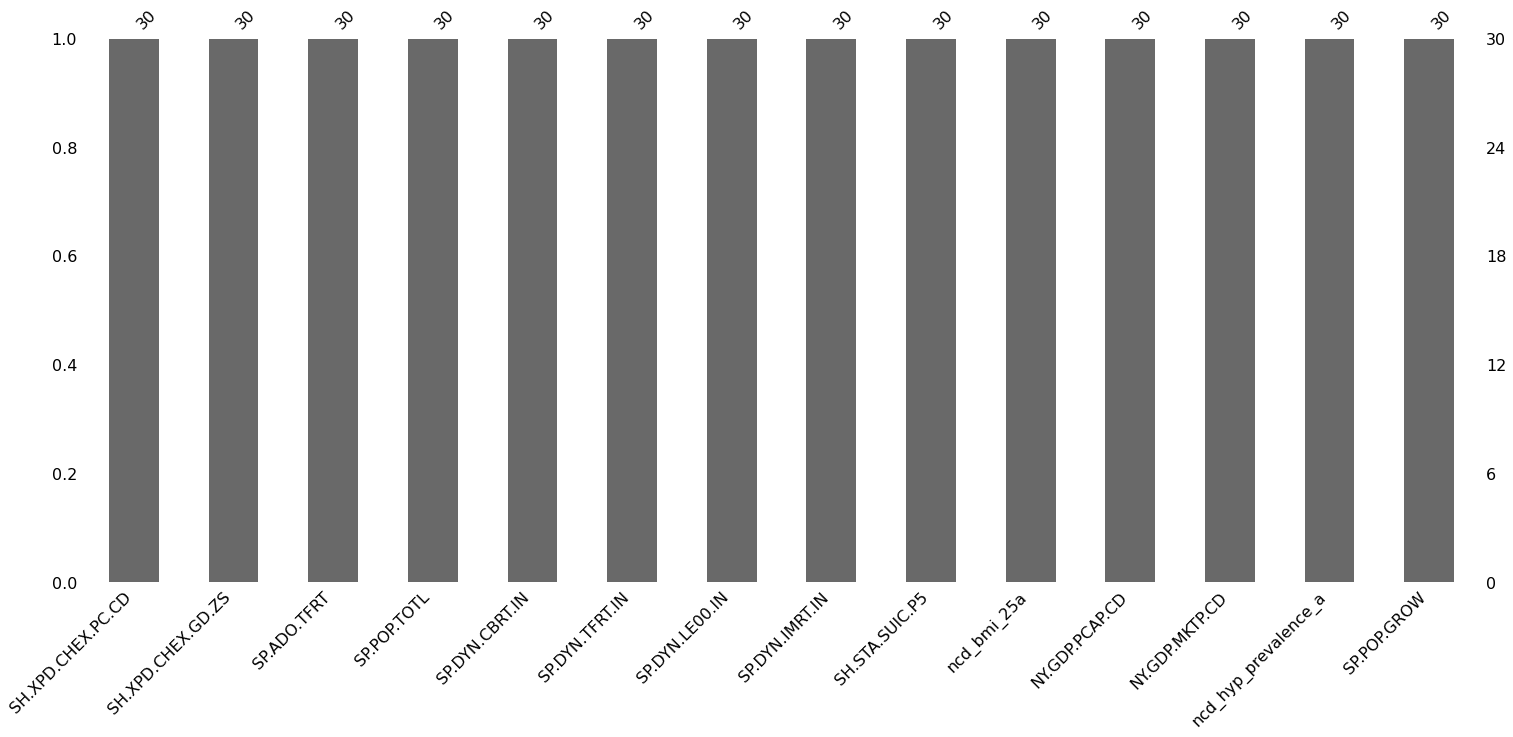

In [196]:
msno.bar(data)
plt.show()

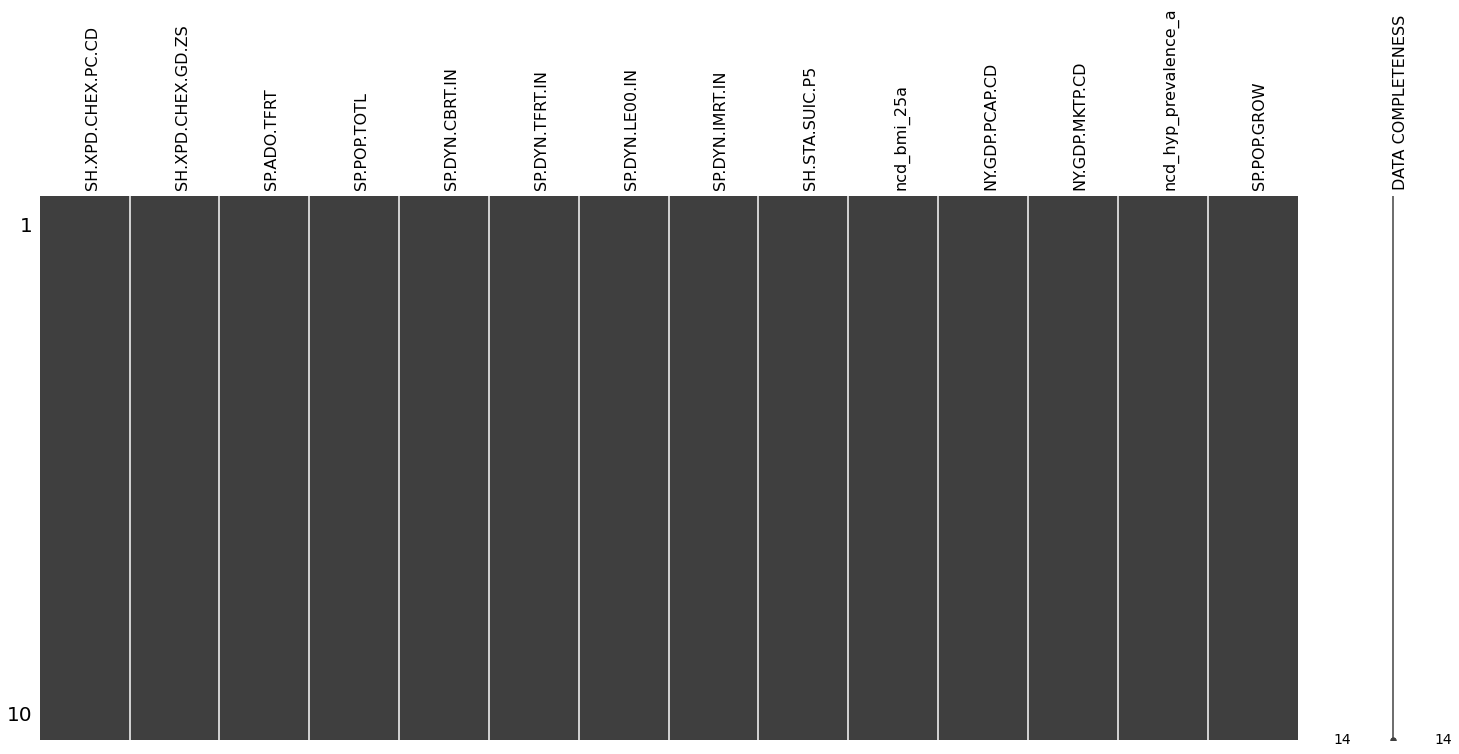

In [197]:
# Tomamos 10 muestras al azar de nuestra población

msno.matrix(data.sample(10), labels = True, label_rotation = 90)
plt.show()

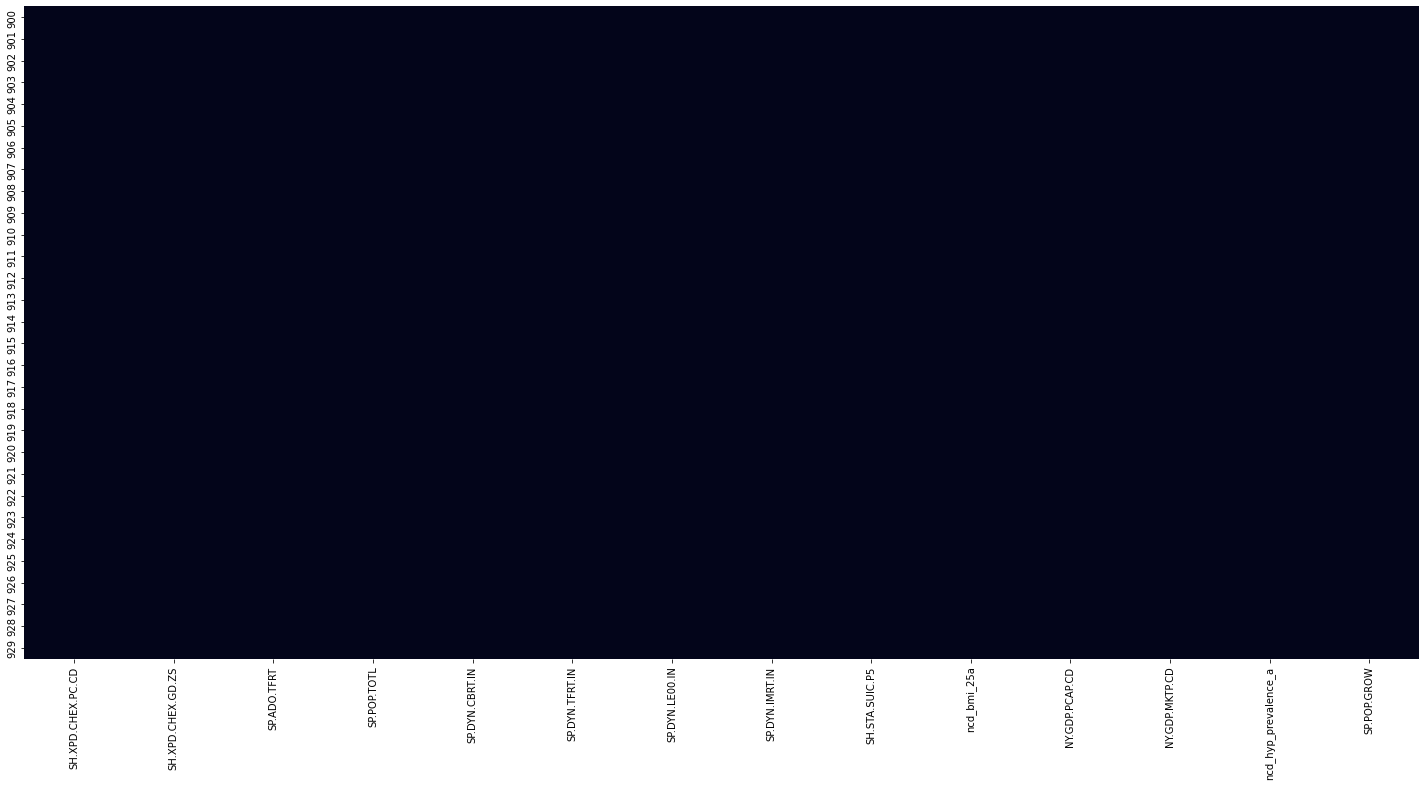

In [198]:
# Otra forma de visualizar la matriz con seaborn

plt.figure(figsize= (25,12))
sns.heatmap(data.isnull(), cbar=False)
plt.show()

No definimos la estrategia que usaremos para la imputación. En este caso, por que no lo necesitamos

# Escalado/normalización (Para este método, usamos MinMaxScaler de Scikit-learn)

 Escalamos todas las variables numericas

In [199]:
# importamos StandarScaler

from sklearn.preprocessing import StandardScaler

# GDP per capita

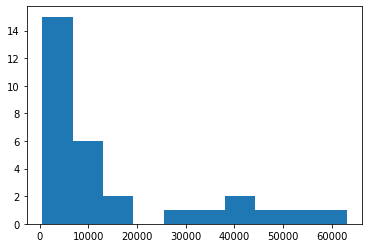

In [200]:
# Trabajaremos con la variable Current health expenditure per capita (current US$). Veamos su distribución

plt.hist(data['NY.GDP.PCAP.CD']) 
plt.show()

In [201]:
# Escalamos 

scaler = StandardScaler()

scaler.fit(data[['NY.GDP.PCAP.CD']])

data['NY.GDP.PCAP.CD'] = scaler.transform(data[['NY.GDP.PCAP.CD']])

C:\Users\USER\AppData\Local\Temp\ipykernel_18748\4186148836.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['NY.GDP.PCAP.CD'] = scaler.transform(data[['NY.GDP.PCAP.CD']])


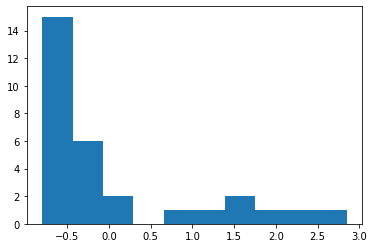

In [202]:
# Observamos cómo quedó la distribución luego de escalar

plt.hist(data['NY.GDP.PCAP.CD']) 
plt.show()

# GDP

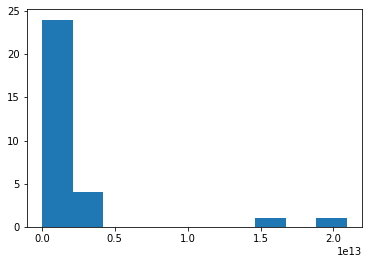

In [203]:
# Trabajaremos con la variable GDP. Veamos su distribución

plt.hist(data['NY.GDP.MKTP.CD']) 
plt.show()

In [204]:
# Escalamos (GDP)

scaler = StandardScaler()

scaler.fit(data[['NY.GDP.MKTP.CD']])

data["NY.GDP.MKTP.CD"] = scaler.transform(data[['NY.GDP.MKTP.CD']])

C:\Users\USER\AppData\Local\Temp\ipykernel_18748\3619323469.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["NY.GDP.MKTP.CD"] = scaler.transform(data[['NY.GDP.MKTP.CD']])


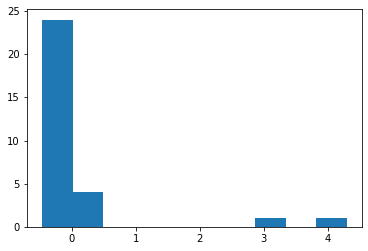

In [205]:
# Observamos cómo quedó la distribución luego de escalar

plt.hist(data['NY.GDP.MKTP.CD']) 
plt.show()

## Suicide mortality rate (per 100,000 population)

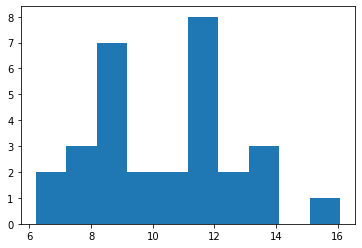

In [206]:
# Trabajaremos con la variable Suicide mortality rate (per 100,000 population). Veamos su distribución

plt.hist(data['SH.STA.SUIC.P5']) 
plt.show()

In [207]:
# Escalamos Suicide mortality rate (per 100,000 population)

scaler = StandardScaler()

scaler.fit(data[['SH.STA.SUIC.P5']])

data["SH.STA.SUIC.P5"] = scaler.transform(data[['SH.STA.SUIC.P5']])

C:\Users\USER\AppData\Local\Temp\ipykernel_18748\1816860225.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["SH.STA.SUIC.P5"] = scaler.transform(data[['SH.STA.SUIC.P5']])


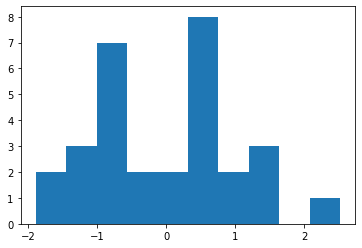

In [208]:
# Observamos cómo quedó la distribución luego de escalar

plt.hist(data['SH.STA.SUIC.P5']) 
plt.show()

## Current health expenditure (% of GDP)

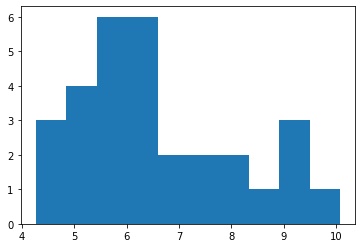

In [209]:
# Trabajaremos con la variable Customer_care_calls. Veamos su distribución

plt.hist(data['SH.XPD.CHEX.GD.ZS']) 
plt.show()

In [210]:
# Escalamos Customer_care_calls

scaler = StandardScaler()

scaler.fit(data[['SH.XPD.CHEX.GD.ZS']])

data["SH.XPD.CHEX.GD.ZS"] = scaler.transform(data[['SH.XPD.CHEX.GD.ZS']])

C:\Users\USER\AppData\Local\Temp\ipykernel_18748\154682944.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["SH.XPD.CHEX.GD.ZS"] = scaler.transform(data[['SH.XPD.CHEX.GD.ZS']])


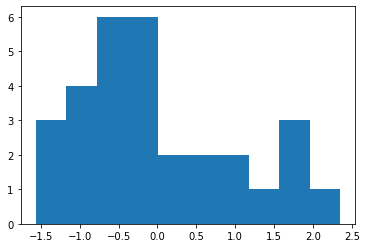

In [211]:
# Observamos cómo quedó la distribución luego de escalar

plt.hist(data['SH.XPD.CHEX.GD.ZS']) 
plt.show()

## Current health expenditure per capita (current US$)

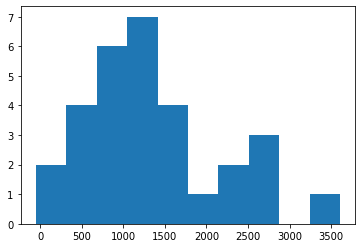

In [212]:
# Trabajaremos con la variable Current health expenditure per capita (current US$). Veamos su distribución

plt.hist(data['SH.XPD.CHEX.PC.CD']) 
plt.show()

In [213]:
# Escalamos Current health expenditure per capita (current US$)

scaler = StandardScaler()

scaler.fit(data[['SH.XPD.CHEX.PC.CD']])

data["SH.XPD.CHEX.PC.CD"] = scaler.transform(data[['SH.XPD.CHEX.PC.CD']])

C:\Users\USER\AppData\Local\Temp\ipykernel_18748\3986210741.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["SH.XPD.CHEX.PC.CD"] = scaler.transform(data[['SH.XPD.CHEX.PC.CD']])


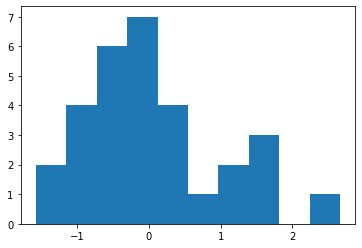

In [214]:
# Observamos cómo quedó la distribución luego de escalar

plt.hist(data['SH.XPD.CHEX.PC.CD']) 
plt.show()

## Adolescent fertility rate (births per 1,000 women ages 15-19)

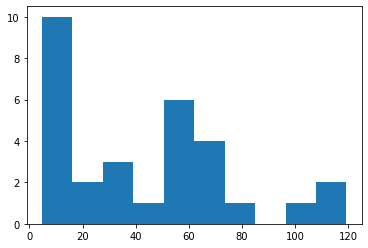

In [215]:
# Trabajaremos con la variable Adolescent fertility rate (births per 1,000 women ages 15-19). Veamos su distribución

plt.hist(data['SP.ADO.TFRT']) 
plt.show()

In [216]:
# Escalamos Adolescent fertility rate (births per 1,000 women ages 15-19)

scaler = StandardScaler()

scaler.fit(data[['SP.ADO.TFRT']])

data["SP.ADO.TFRT"] = scaler.transform(data[['SP.ADO.TFRT']])

C:\Users\USER\AppData\Local\Temp\ipykernel_18748\910245718.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["SP.ADO.TFRT"] = scaler.transform(data[['SP.ADO.TFRT']])


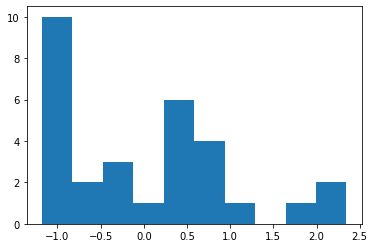

In [217]:
# Observamos cómo quedó la distribución luego de escalar

plt.hist(data['SP.ADO.TFRT']) 
plt.show()

## Birth rate, crude (per 1000 people)

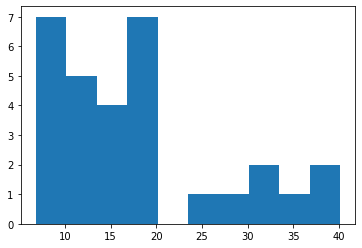

In [218]:
# Trabajaremos con la variable Birth rate, crude (per 1000 people). Veamos su distribución

plt.hist(data['SP.DYN.CBRT.IN']) 
plt.show()

In [219]:
# Escalamos Birth rate, crude (per 1000 people)

scaler = StandardScaler()

scaler.fit(data[['SP.DYN.CBRT.IN']])

data["SP.DYN.CBRT.IN"] = scaler.transform(data[['SP.DYN.CBRT.IN']])

C:\Users\USER\AppData\Local\Temp\ipykernel_18748\3684788922.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["SP.DYN.CBRT.IN"] = scaler.transform(data[['SP.DYN.CBRT.IN']])


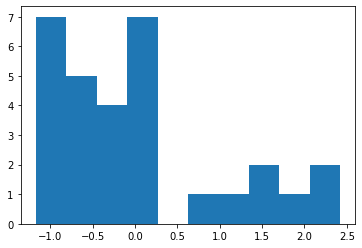

In [220]:
# Observamos cómo quedó la distribución luego de escalar

plt.hist(data['SP.DYN.CBRT.IN']) 
plt.show()

## Mortality rate, infant (per 1,000 live births)

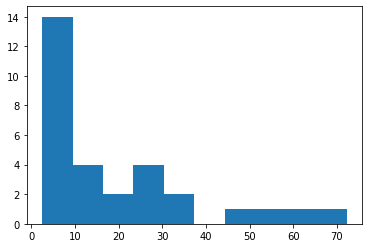

In [221]:
# Trabajaremos con la variable Mortality rate, infant (per 1,000 live births). Veamos su distribución

plt.hist(data['SP.DYN.IMRT.IN']) 
plt.show()

In [222]:
# Escalamos Mortality rate, infant (per 1,000 live births)

scaler = StandardScaler()

scaler.fit(data[['SP.DYN.IMRT.IN']])

data["SP.DYN.IMRT.IN"] = scaler.transform(data[['SP.DYN.IMRT.IN']])

C:\Users\USER\AppData\Local\Temp\ipykernel_18748\480758390.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["SP.DYN.IMRT.IN"] = scaler.transform(data[['SP.DYN.IMRT.IN']])


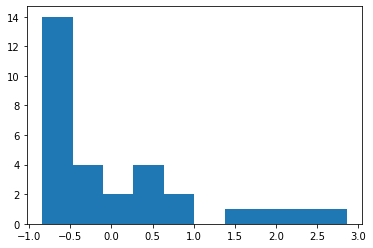

In [223]:
# Observamos cómo quedó la distribución luego de escalar

plt.hist(data['SP.DYN.IMRT.IN']) 
plt.show()

## Fertility rate, total (births per woman)

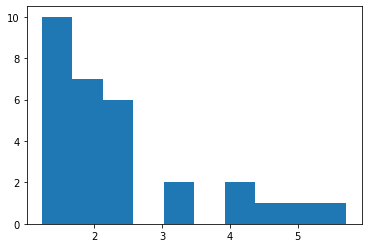

In [224]:
# Trabajaremos con la variable Fertility rate, total (births per woman). Veamos su distribución

plt.hist(data['SP.DYN.TFRT.IN']) 
plt.show()

In [225]:
# Escalamos Fertility rate, total (births per woman)

scaler = StandardScaler()

scaler.fit(data[['SP.DYN.TFRT.IN']])

data["SP.DYN.TFRT.IN"] = scaler.transform(data[['SP.DYN.TFRT.IN']])

C:\Users\USER\AppData\Local\Temp\ipykernel_18748\1801280473.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["SP.DYN.TFRT.IN"] = scaler.transform(data[['SP.DYN.TFRT.IN']])


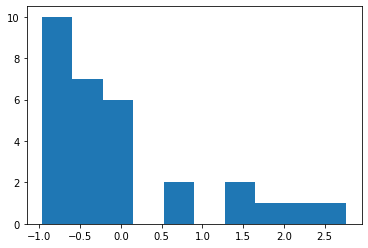

In [226]:
# Observamos cómo quedó la distribución luego de escalar

plt.hist(data['SP.DYN.TFRT.IN']) 
plt.show()

## Population growth (annual %)

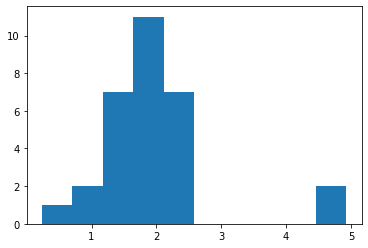

In [227]:
# Trabajaremos con la variable Population growth (annual %). Veamos su distribución

plt.hist(data['SP.POP.GROW']) 
plt.show()

In [228]:
# Escalamos Population growth (annual %)

scaler = StandardScaler()

scaler.fit(data[['SP.POP.GROW']])

data["SP.POP.GROW"] = scaler.transform(data[['SP.POP.GROW']])

C:\Users\USER\AppData\Local\Temp\ipykernel_18748\897902998.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["SP.POP.GROW"] = scaler.transform(data[['SP.POP.GROW']])


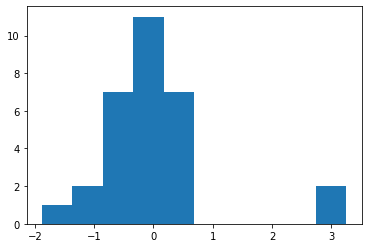

In [229]:
# Observamos cómo quedó la distribución luego de escalar

plt.hist(data['SP.POP.GROW']) 
plt.show()

## Population, total

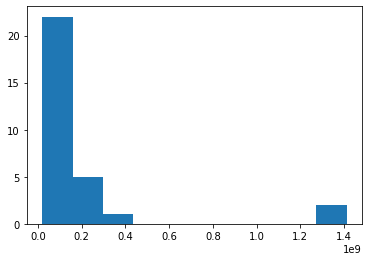

In [230]:
# Trabajaremos con la variable Population, total. Veamos su distribución

plt.hist(data['SP.POP.TOTL']) 
plt.show()

In [231]:
# Escalamos Population, total

scaler = StandardScaler()

scaler.fit(data[['SP.POP.TOTL']])

data["SP.POP.TOTL"] = scaler.transform(data[['SP.POP.TOTL']])

C:\Users\USER\AppData\Local\Temp\ipykernel_18748\1589506760.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["SP.POP.TOTL"] = scaler.transform(data[['SP.POP.TOTL']])


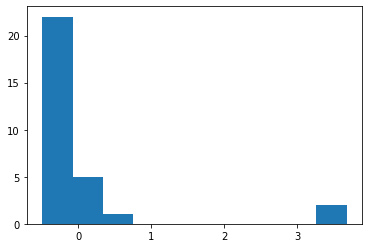

In [232]:
# Observamos cómo quedó la distribución luego de escalar

plt.hist(data['SP.POP.TOTL']) 
plt.show()

# Prevalence of hypertension among adults aged 30-79 years

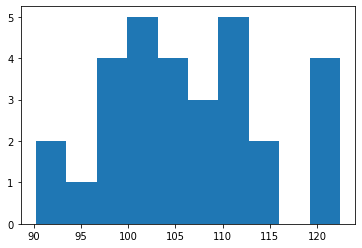

In [233]:
plt.hist(data['ncd_hyp_prevalence_a']) 
plt.show()

In [234]:
# Escalamos Prevalence of hypertension among adults aged 30-79 years

scaler = StandardScaler()

scaler.fit(data[['ncd_hyp_prevalence_a']])

data["ncd_hyp_prevalence_a"] = scaler.transform(data[['ncd_hyp_prevalence_a']])

C:\Users\USER\AppData\Local\Temp\ipykernel_18748\119564989.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["ncd_hyp_prevalence_a"] = scaler.transform(data[['ncd_hyp_prevalence_a']])


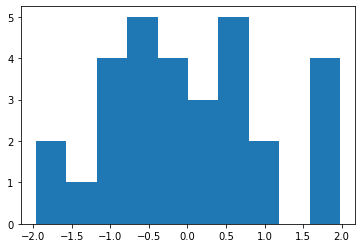

In [235]:
# Observamos cómo quedó la distribución luego de escalar

plt.hist(data['ncd_hyp_prevalence_a']) 
plt.show()

# BMI &GreaterEqual; 25 (crude estimate) (%)

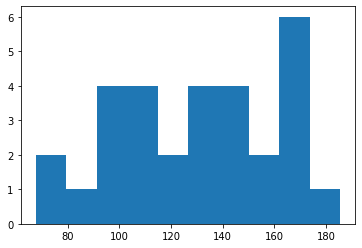

In [236]:
plt.hist(data['ncd_bmi_25a']) 
plt.show()

In [237]:
# Escalamos BMI &GreaterEqual; 25 (crude estimate) (%)

scaler = StandardScaler()

scaler.fit(data[['ncd_bmi_25a']])

data["ncd_bmi_25a"] = scaler.transform(data[['ncd_bmi_25a']])

C:\Users\USER\AppData\Local\Temp\ipykernel_18748\2177445613.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["ncd_bmi_25a"] = scaler.transform(data[['ncd_bmi_25a']])


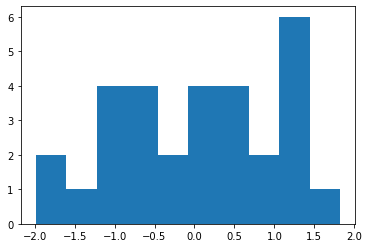

In [238]:
# Observamos cómo quedó la distribución luego de escalar

plt.hist(data['ncd_bmi_25a']) 
plt.show()

# Correlacion de variables

In [239]:
import seaborn as sn

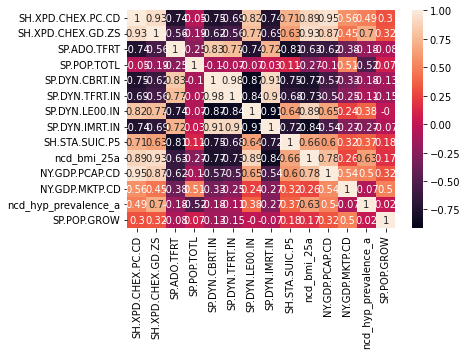

In [240]:
cordata=data.corr().round(2)
sn.heatmap(cordata,annot=True)
plt.show()

#### Aqui un poco mas grande usando matplotlib 

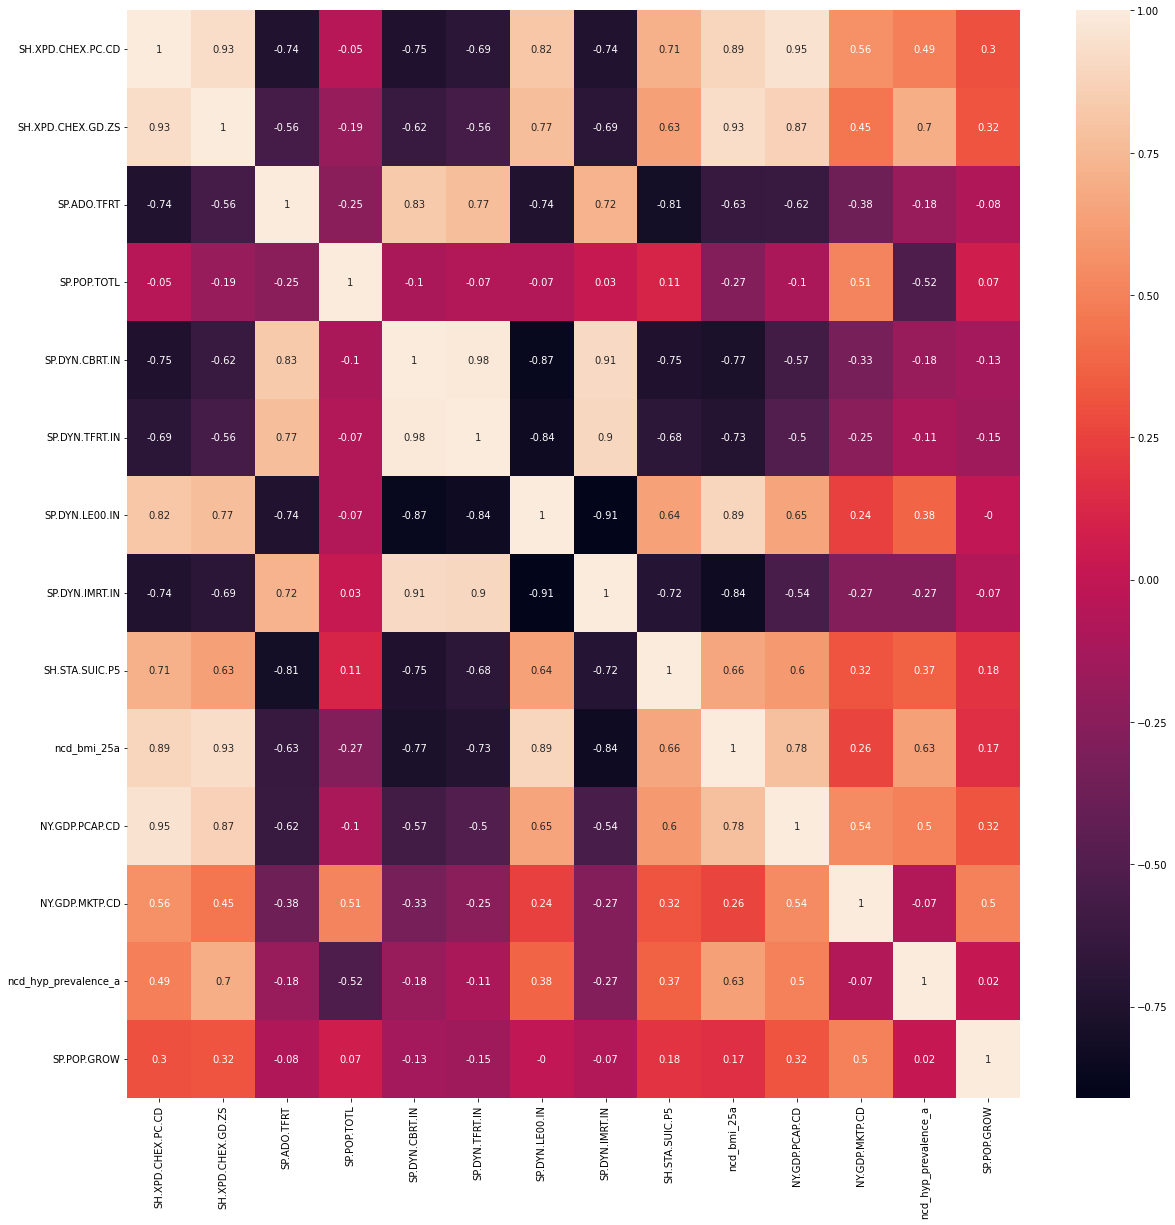

In [241]:
fig,ax=plt.subplots(figsize=(20,20))
sn.heatmap(cordata,annot=True)
plt.show()

## Simulamos Random Forest generando muestreos

Usare RandomForestRegressor para mi modelo predictorio

### Paso 1

In [242]:
#imprimo un muestro usando 2/3 de los datos
print(data.sample(frac=2/3))

     SH.XPD.CHEX.PC.CD  SH.XPD.CHEX.GD.ZS  SP.ADO.TFRT  SP.POP.TOTL  \
925          -0.037234          -0.243834    -0.273008    -0.497092   
928           2.663630           2.349224    -0.833578     0.440338   
929          -0.699397          -0.582279     0.758321    -0.376849   
927          -1.049701          -0.504135     2.181008    -0.375571   
907          -1.480246          -1.266935     2.346058    -0.286023   
911           0.903863           0.750558    -1.108028    -0.412711   
915          -0.556688          -0.960273     0.089280     0.266276   
920          -1.574353          -1.563989     1.802046     0.063973   
918          -0.242743          -0.414902    -0.702289    -0.489101   
900          -0.892897          -0.242897     0.444091    -0.438035   
903          -0.726027          -1.027670     1.166704    -0.060470   
919          -0.230624          -0.266151     0.447890    -0.167820   
902           1.799093           1.810580    -0.999624    -0.477770   
905   

### simulacion  + bootstrap

In [243]:
print(data.sample(frac=2/3,replace=True))

     SH.XPD.CHEX.PC.CD  SH.XPD.CHEX.GD.ZS  SP.ADO.TFRT  SP.POP.TOTL  \
928           2.663630           2.349224    -0.833578     0.440338   
905           0.198154           0.449967    -0.146097    -0.497516   
924           0.197168          -0.005404    -1.033926    -0.441125   
929          -0.699397          -0.582279     0.758321    -0.376849   
908          -0.199625           0.003245     0.617324    -0.402145   
916          -0.619494          -1.119294    -1.020805     3.588197   
900          -0.892897          -0.242897     0.444091    -0.438035   
913           1.431087           1.370534    -1.177708    -0.352617   
910          -0.558300          -0.475357     0.263048    -0.247675   
915          -0.556688          -0.960273     0.089280     0.266276   
907          -1.480246          -1.266935     2.346058    -0.286023   
909           1.679073           1.633212    -1.096985    -0.305239   
917           1.051615           0.848172    -1.174776    -0.376426   
921   

# Creación de Bosque Aleatorio de Regresion(RandomForestRegressor)

In [244]:
import numpy as np
from sklearn import svm
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
import sklearn
from sklearn.ensemble import RandomForestRegressor

In [245]:
data.head(10)

,SH.XPD.CHEX.PC.CD,SH.XPD.CHEX.GD.ZS,SP.ADO.TFRT,SP.POP.TOTL,SP.DYN.CBRT.IN,SP.DYN.TFRT.IN,SP.DYN.LE00.IN,SP.DYN.IMRT.IN,SH.STA.SUIC.P5,ncd_bmi_25a,NY.GDP.PCAP.CD,NY.GDP.MKTP.CD,ncd_hyp_prevalence_a,SP.POP.GROW
900,-0.892897,-0.242897,0.444091,-0.438035,1.456041,1.483497,65.173000,1.414734,-0.439172,-0.788102,-0.798294,-0.459710,1.789502,0.545813
901,0.253668,1.584303,0.586219,-0.418676,-0.108636,-0.133834,76.813000,-0.571168,0.575590,1.227860,-0.328014,-0.375604,1.980330,0.468138
902,1.799093,1.810580,-0.999624,-0.477770,-0.663375,-0.676552,83.200000,-0.810114,1.430330,1.823183,2.183657,-0.162025,1.620587,0.408255
903,-0.726027,-1.027670,1.166704,-0.060470,-0.011039,-0.338602,72.868000,0.315585,-1.006428,-0.920256,-0.696089,-0.379175,-1.202494,0.496954
904,-0.147027,0.389348,0.380343,0.083247,-0.451681,-0.572503,76.084000,-0.279124,-0.490096,0.366312,-0.431222,-0.134543,0.680672,0.413293
905,0.198154,0.449967,-0.146097,-0.497516,-0.610532,-0.651580,80.329000,-0.666746,0.379421,0.883256,-0.057881,-0.406759,0.655910,0.375286
906,0.258358,-0.133342,-1.088420,3.681554,-0.984743,-0.577497,77.097000,-0.682676,0.852372,-0.371732,-0.221766,2.879159,-1.583893,0.297476
907,-1.480246,-1.266935,2.346058,-0.286023,2.421872,2.767040,60.971000,2.412995,-1.487162,-1.637863,-0.796709,-0.453199,-0.020164,0.028357
908,-0.199625,0.003245,0.617324,-0.402145,-0.349016,-0.518398,77.460000,-0.369392,-0.612162,0.396675,-0.518802,-0.402759,-0.379055,-0.107143
909,1.679073,1.633212,-1.096985,-0.305239,-0.900627,-0.719003,80.941463,-0.810114,1.296173,1.268615,1.867320,0.411294,1.690372,-0.256581


In [246]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 900 to 929
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SH.XPD.CHEX.PC.CD     30 non-null     float64
 1   SH.XPD.CHEX.GD.ZS     30 non-null     float64
 2   SP.ADO.TFRT           30 non-null     float64
 3   SP.POP.TOTL           30 non-null     float64
 4   SP.DYN.CBRT.IN        30 non-null     float64
 5   SP.DYN.TFRT.IN        30 non-null     float64
 6   SP.DYN.LE00.IN        30 non-null     float64
 7   SP.DYN.IMRT.IN        30 non-null     float64
 8   SH.STA.SUIC.P5        30 non-null     float64
 9   ncd_bmi_25a           30 non-null     float64
 10  NY.GDP.PCAP.CD        30 non-null     float64
 11  NY.GDP.MKTP.CD        30 non-null     float64
 12  ncd_hyp_prevalence_a  30 non-null     float64
 13  SP.POP.GROW           30 non-null     float64
dtypes: float64(14)
memory usage: 3.5 KB


In [247]:
data.describe()

,SH.XPD.CHEX.PC.CD,SH.XPD.CHEX.GD.ZS,SP.ADO.TFRT,SP.POP.TOTL,SP.DYN.CBRT.IN,SP.DYN.TFRT.IN,SP.DYN.LE00.IN,SP.DYN.IMRT.IN,SH.STA.SUIC.P5,ncd_bmi_25a,NY.GDP.PCAP.CD,NY.GDP.MKTP.CD,ncd_hyp_prevalence_a,SP.POP.GROW
count,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,30.000000,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01
mean,-6.661338e-17,5.255056e-16,7.031412e-17,6.106227e-17,2.488750e-16,-3.545775e-16,73.736416,4.440892e-17,-1.805038e-15,5.847175e-16,-1.480297e-17,2.035409e-17,1.125026e-15,1.480297e-17
std,1.017095e+00,1.017095e+00,1.017095e+00,1.017095e+00,1.017095e+00,1.017095e+00,6.942501,1.017095e+00,1.017095e+00,1.017095e+00,1.017095e+00,1.017095e+00,1.017095e+00,1.017095e+00
min,-1.574353e+00,-1.563989e+00,-1.177708e+00,-4.975161e-01,-1.170231e+00,-9.687200e-01,55.018000,-8.419730e-01,-1.887637e+00,-1.985646e+00,-7.982940e-01,-4.597100e-01,-1.966345e+00,-1.877714e+00
25%,-6.821857e-01,-7.280231e-01,-9.947387e-01,-4.331954e-01,-7.846966e-01,-6.584471e-01,70.182000,-7.278102e-01,-7.640772e-01,-8.017360e-01,-7.036628e-01,-4.073083e-01,-7.493122e-01,-5.323343e-01
50%,-2.082245e-01,-2.433654e-01,-2.840847e-02,-3.530655e-01,-1.836402e-01,-3.977014e-01,75.607500,-4.065613e-01,4.572561e-02,1.619879e-01,-4.515447e-01,-3.707438e-01,-2.238952e-02,-1.096731e-01
75%,2.571851e-01,6.754102e-01,5.834383e-01,-7.594414e-02,2.148622e-01,-4.893058e-02,77.415122,3.753214e-01,6.808775e-01,9.792208e-01,5.235578e-02,-1.277556e-01,6.296970e-01,3.558339e-01
max,2.663630e+00,2.349224e+00,2.346058e+00,3.681554e+00,2.421872e+00,2.767040e+00,83.200000,2.859027e+00,2.522049e+00,1.823183e+00,2.845012e+00,4.291885e+00,1.980330e+00,3.255665e+00


In [248]:
# Obtenemos variables independientes
X = data.drop(["SP.DYN.LE00.IN"],axis = 1)
X.head()

,SH.XPD.CHEX.PC.CD,SH.XPD.CHEX.GD.ZS,SP.ADO.TFRT,SP.POP.TOTL,SP.DYN.CBRT.IN,SP.DYN.TFRT.IN,SP.DYN.IMRT.IN,SH.STA.SUIC.P5,ncd_bmi_25a,NY.GDP.PCAP.CD,NY.GDP.MKTP.CD,ncd_hyp_prevalence_a,SP.POP.GROW
900,-0.892897,-0.242897,0.444091,-0.438035,1.456041,1.483497,1.414734,-0.439172,-0.788102,-0.798294,-0.459710,1.789502,0.545813
901,0.253668,1.584303,0.586219,-0.418676,-0.108636,-0.133834,-0.571168,0.575590,1.227860,-0.328014,-0.375604,1.980330,0.468138
902,1.799093,1.810580,-0.999624,-0.477770,-0.663375,-0.676552,-0.810114,1.430330,1.823183,2.183657,-0.162025,1.620587,0.408255
903,-0.726027,-1.027670,1.166704,-0.060470,-0.011039,-0.338602,0.315585,-1.006428,-0.920256,-0.696089,-0.379175,-1.202494,0.496954
904,-0.147027,0.389348,0.380343,0.083247,-0.451681,-0.572503,-0.279124,-0.490096,0.366312,-0.431222,-0.134543,0.680672,0.413293


In [249]:
data

,SH.XPD.CHEX.PC.CD,SH.XPD.CHEX.GD.ZS,SP.ADO.TFRT,SP.POP.TOTL,SP.DYN.CBRT.IN,SP.DYN.TFRT.IN,SP.DYN.LE00.IN,SP.DYN.IMRT.IN,SH.STA.SUIC.P5,ncd_bmi_25a,NY.GDP.PCAP.CD,NY.GDP.MKTP.CD,ncd_hyp_prevalence_a,SP.POP.GROW
900,-0.892897,-0.242897,0.444091,-0.438035,1.456041,1.483497,65.173000,1.414734,-0.439172,-0.788102,-0.798294,-0.459710,1.789502,0.545813
901,0.253668,1.584303,0.586219,-0.418676,-0.108636,-0.133834,76.813000,-0.571168,0.575590,1.227860,-0.328014,-0.375604,1.980330,0.468138
902,1.799093,1.810580,-0.999624,-0.477770,-0.663375,-0.676552,83.200000,-0.810114,1.430330,1.823183,2.183657,-0.162025,1.620587,0.408255
903,-0.726027,-1.027670,1.166704,-0.060470,-0.011039,-0.338602,72.868000,0.315585,-1.006428,-0.920256,-0.696089,-0.379175,-1.202494,0.496954
904,-0.147027,0.389348,0.380343,0.083247,-0.451681,-0.572503,76.084000,-0.279124,-0.490096,0.366312,-0.431222,-0.134543,0.680672,0.413293
905,0.198154,0.449967,-0.146097,-0.497516,-0.610532,-0.651580,80.329000,-0.666746,0.379421,0.883256,-0.057881,-0.406759,0.655910,0.375286
906,0.258358,-0.133342,-1.088420,3.681554,-0.984743,-0.577497,77.097000,-0.682676,0.852372,-0.371732,-0.221766,2.879159,-1.583893,0.297476
907,-1.480246,-1.266935,2.346058,-0.286023,2.421872,2.767040,60.971000,2.412995,-1.487162,-1.637863,-0.796709,-0.453199,-0.020164,0.028357
908,-0.199625,0.003245,0.617324,-0.402145,-0.349016,-0.518398,77.460000,-0.369392,-0.612162,0.396675,-0.518802,-0.402759,-0.379055,-0.107143
909,1.679073,1.633212,-1.096985,-0.305239,-0.900627,-0.719003,80.941463,-0.810114,1.296173,1.268615,1.867320,0.411294,1.690372,-0.256581


In [250]:
# Obtenemos variable dependiente
Y = data.pop('SP.DYN.LE00.IN')
Y

900    65.173000
901    76.813000
902    83.200000
903    72.868000
904    76.084000
905    80.329000
906    77.097000
907    60.971000
908    77.460000
909    80.941463
910    72.150000
911    82.334146
912    66.953000
913    82.175610
914    80.902439
915    71.908000
916    69.887000
917    82.343902
918    77.144000
919    75.131000
920    55.018000
921    71.067000
922    67.428000
923    76.947000
924    76.600000
925    74.353659
926    71.338780
927    65.815000
928    77.280488
929    64.379000
Name: SP.DYN.LE00.IN, dtype: float64

In [251]:
# Separamos datos para ajuste y prueba
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=100)

In [252]:
Regresor=RandomForestRegressor(n_estimators=10,random_state=0)

In [253]:
lm = RandomForestRegressor()

model=lm.fit(X_train,y_train)

In [254]:
# Encontramos el accuracy promedio usando datos de test
score = model.score(X_test, y_test)
print(score)

0.759300409349197


In [255]:
# Cargamos el modelo
pkl_filename = "pickle_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(model,file)

### Prediccion con numeros aleatorios

In [257]:
#Utilizo la libreria random para generar numeros aleatorios
import random

In [265]:
#Creo una lista vacia llamada "a"
a=[]

In [266]:
#Genero 13 numeros aleatorios entre -4 y 4 dentro de la lista "a"
for i in range(13):
...     a.append(random.uniform(-4,4))

In [267]:
a

[-0.23528767731523725,
 -0.0954674606095951,
 -2.420644364673323,
 3.232022333066202,
 0.3549149941522387,
 1.4944814935628443,
 -2.091013511888004,
 2.658921290375851,
 -2.4223883615276316,
 -0.21525824706319963,
 -2.997773464235932,
 -0.4590956857166306,
 -3.771877564377772]

In [268]:
#Utilizo la lista "a" para realizar una prediccion
x_in = np.asarray(a).reshape(1,-1)
predicts = model.predict(x_in)
predicts[0]

C:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


74.66916219512198